In [1]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [2]:
data_folder = r"E:\data\gst-0730-23\FoolingS_default"

expertise_list = [12, 24, 36]
s_performance_list = []
s_variance_list = []
for expertise in expertise_list:
    s_performance_file = data_folder + r"\s_performance_across_K_{0}".format(expertise)
    s_cog_performance_file = data_folder + r"\s_cog_performance_across_K_time_{0}".format(expertise)
    s_variance_file = data_folder + r"\s_variance_across_K_{0}".format(expertise)
    s_performance_time_file = data_folder + r"\s_performance_across_K_time_{0}".format(expertise)

    with open(s_performance_file, 'rb') as infile:
        s_fitness = pickle.load(infile)
    with open(s_cog_performance_file, 'rb') as infile:
        s_cog_fitness = pickle.load(infile)
    with open(s_variance_file, 'rb') as infile:
        s_variance = pickle.load(infile)
    with open(s_performance_time_file, 'rb') as infile:
        s_performance_time = pickle.load(infile)

    s_performance_list.append(s_fitness)
    s_variance_list.append(s_variance)
print(np.array(s_performance_list).shape)

(3, 9)


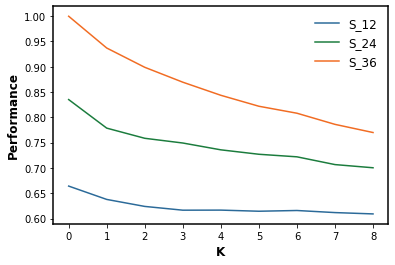

In [5]:
# S Fitness
x = range(len(s_performance_list[0]))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
colors = [nature_blue, nature_green, nature_orange]
for index, value in enumerate(expertise_list):
    plt.plot(x, s_performance_list[index], "-", label="S_{0}".format(value), color=colors[index])

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Gs_performance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

In [ ]:
# # GST Variance
# x = range(len(s1_variance))
# fig, ax = plt.subplots()
# ax.spines["left"].set_linewidth(1.5)
# ax.spines["right"].set_linewidth(1.5)
# ax.spines["top"].set_linewidth(1.5)
# ax.spines["bottom"].set_linewidth(1.5)
# plt.plot(x, s1_variance, "k-", label="S28", color=nature_blue)
# plt.plot(x, s2_variance, "k-", label="S32", color=nature_green)
# plt.plot(x, s3_variance, "k-", label="S36", color=nature_orange)
# plt.plot(x, s4_variance, "k-", label="S40", color=morandi_pink)
#
# plt.xlabel('K', fontweight='bold', fontsize=12)
# plt.ylabel('Variance', fontweight='bold', fontsize=12)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"\Ss_variance.png", transparent=True, dpi=300)
# plt.show()
# # plt.clf()

In [ ]:
# # GST First Quantile Fitness
# x = range(len(s1_first))
# fig, ax = plt.subplots()
# ax.spines["left"].set_linewidth(1.5)
# ax.spines["right"].set_linewidth(1.5)
# ax.spines["top"].set_linewidth(1.5)
# ax.spines["bottom"].set_linewidth(1.5)
# plt.plot(x, s1_first, "k--", label="S16_first", color=nature_blue)
# plt.plot(x, s1_fitness, "k-", label="S16_mean", color=nature_blue)
# plt.plot(x, s1_last, "k:", label="S16_last", color=nature_blue)
# plt.plot(x, s2_first, "k-", label="S24", color=nature_green)
# plt.plot(x, s3_first, "k-", label="S32", color=nature_orange)
# plt.plot(x, s4_first, "k-", label="S40", color=morandi_pink)
#
# plt.xlabel('K', fontweight='bold', fontsize=12)
# plt.ylabel('Performance', fontweight='bold', fontsize=12)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"\Ss_first_quantile.png", transparent=True, dpi=300)
# plt.show()
# # plt.clf()

In [ ]:
# # GST Last Quantile Fitness
# x = range(len(s1_last))
# fig, ax = plt.subplots()
# ax.spines["left"].set_linewidth(1.5)
# ax.spines["right"].set_linewidth(1.5)
# ax.spines["top"].set_linewidth(1.5)
# ax.spines["bottom"].set_linewidth(1.5)
# plt.plot(x, s1_last, "k-", label="S16", color=nature_blue)
# plt.plot(x, s2_last, "k-", label="S24", color=nature_green)
# plt.plot(x, s3_last, "k-", label="S32", color=nature_orange)
# plt.plot(x, s4_last, "k-", label="S40", color=morandi_pink)
#
# plt.xlabel('K', fontweight='bold', fontsize=12)
# plt.ylabel('Performance', fontweight='bold', fontsize=12)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=12)
# plt.savefig(data_folder + r"\Ss_last_quantile.png", transparent=True, dpi=300)
# plt.show()
# # plt.clf()